# Bank Marketing ML - Complete Analysis Pipeline

This notebook demonstrates a comprehensive machine learning workflow for predicting bank term deposit subscriptions.

## Table of Contents
1. [Setup and Imports](#1-setup-and-imports)
2. [Data Loading and Exploration](#2-data-loading-and-exploration)
3. [Data Preprocessing](#3-data-preprocessing)
4. [Model Training](#4-model-training)
5. [Model Evaluation](#5-model-evaluation)
6. [Results Comparison](#6-results-comparison)
7. [Conclusion](#7-conclusion)

---

**Dataset:** Bank Marketing Dataset (UCI ML Repository)
**Target:** Predict if a client will subscribe to a bank term deposit (binary classification)

## 1. Setup and Imports

In [2]:
# Standard library imports
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Add src directory to path
sys.path.insert(0, os.path.abspath('..'))

# Import custom modules
from src.preprocessing import DataPreprocessor
from src.model_training import ModelTrainer
from src.model_evaluation import ModelEvaluator, generate_full_report

print("✓ All imports successful!")
print(f"\nPython version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ All imports successful!

Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
Pandas version: 2.2.2
NumPy version: 1.26.4


## 2. Data Loading and Exploration

In [4]:
# Load the dataset
DATA_PATH = '../bank-additional-full.csv'

df = pd.read_csv(DATA_PATH, sep=';')

print(f"Dataset Shape: {df.shape}")
print(f"\nNumber of samples: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1] - 1}")
print(f"Target variable: 'y' (subscribed to term deposit)")

Dataset Shape: (41188, 21)

Number of samples: 41,188
Number of features: 20
Target variable: 'y' (subscribed to term deposit)


In [5]:
# Display first few rows
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Dataset info
print("\nDataset Information:")
print("="*50)
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf

In [7]:
# Statistical summary
print("\nStatistical Summary - Numerical Features:")
df.describe()


Statistical Summary - Numerical Features:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000



Target Variable Distribution:
  no: 36,548 (88.73%)
  yes: 4,640 (11.27%)


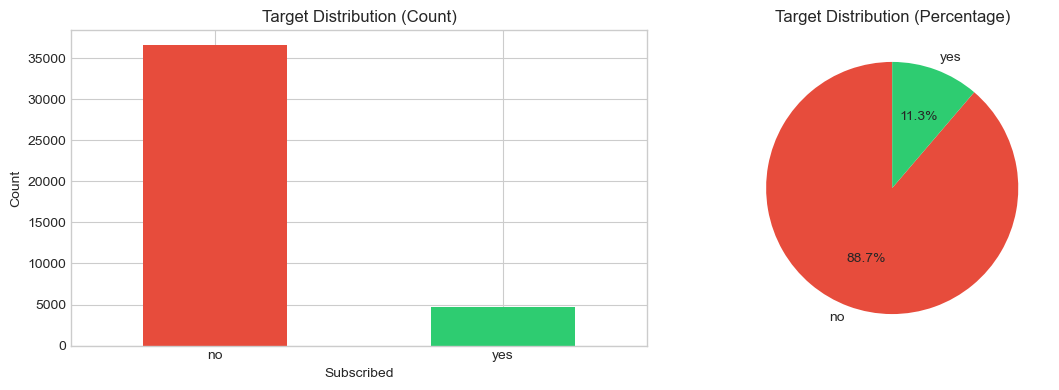


⚠️ Note: The dataset is imbalanced (~88.7% 'no' vs ~11.3% 'yes')


In [8]:
# Target variable distribution
print("\nTarget Variable Distribution:")
print("="*50)
target_counts = df['y'].value_counts()
target_pct = df['y'].value_counts(normalize=True) * 100

for val in target_counts.index:
    print(f"  {val}: {target_counts[val]:,} ({target_pct[val]:.2f}%)")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart
colors = ['#e74c3c', '#2ecc71']
target_counts.plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('Target Distribution (Count)')
axes[0].set_xlabel('Subscribed')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Target Distribution (Percentage)')

plt.tight_layout()
plt.show()

print("\n⚠️ Note: The dataset is imbalanced (~88.7% 'no' vs ~11.3% 'yes')")

In [9]:
# Analyze categorical features
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                    'loan', 'contact', 'month', 'day_of_week', 'poutcome']

print("Categorical Features - Unique Values:")
print("="*50)
for col in categorical_cols:
    unique_vals = df[col].nunique()
    unknown_count = (df[col] == 'unknown').sum()
    unknown_pct = (unknown_count / len(df)) * 100
    print(f"  {col}: {unique_vals} unique values", end="")
    if unknown_count > 0:
        print(f" | 'unknown': {unknown_count:,} ({unknown_pct:.2f}%)")
    else:
        print()

Categorical Features - Unique Values:
  job: 12 unique values | 'unknown': 330 (0.80%)
  marital: 4 unique values | 'unknown': 80 (0.19%)
  education: 8 unique values | 'unknown': 1,731 (4.20%)
  default: 3 unique values | 'unknown': 8,597 (20.87%)
  housing: 3 unique values | 'unknown': 990 (2.40%)
  loan: 3 unique values | 'unknown': 990 (2.40%)
  contact: 2 unique values
  month: 10 unique values
  day_of_week: 5 unique values
  poutcome: 3 unique values


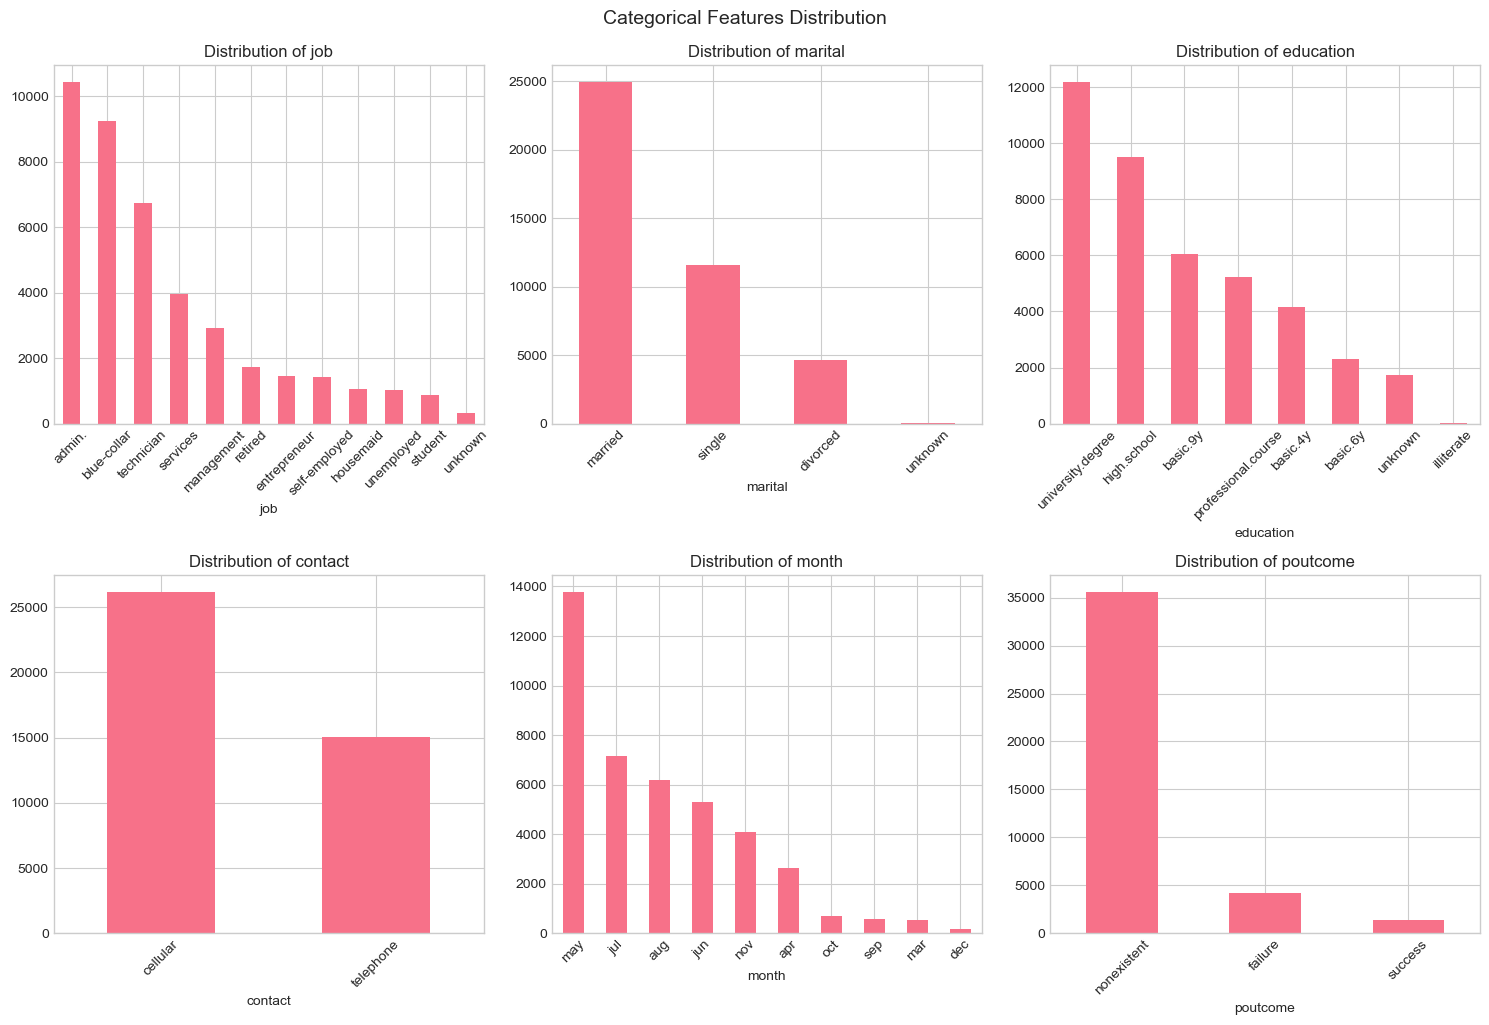

In [11]:
# Visualize categorical features distribution
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

key_categorical = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

for idx, col in enumerate(key_categorical):
    df[col].value_counts().plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle('Categorical Features Distribution', y=1.02, fontsize=14)
plt.show()

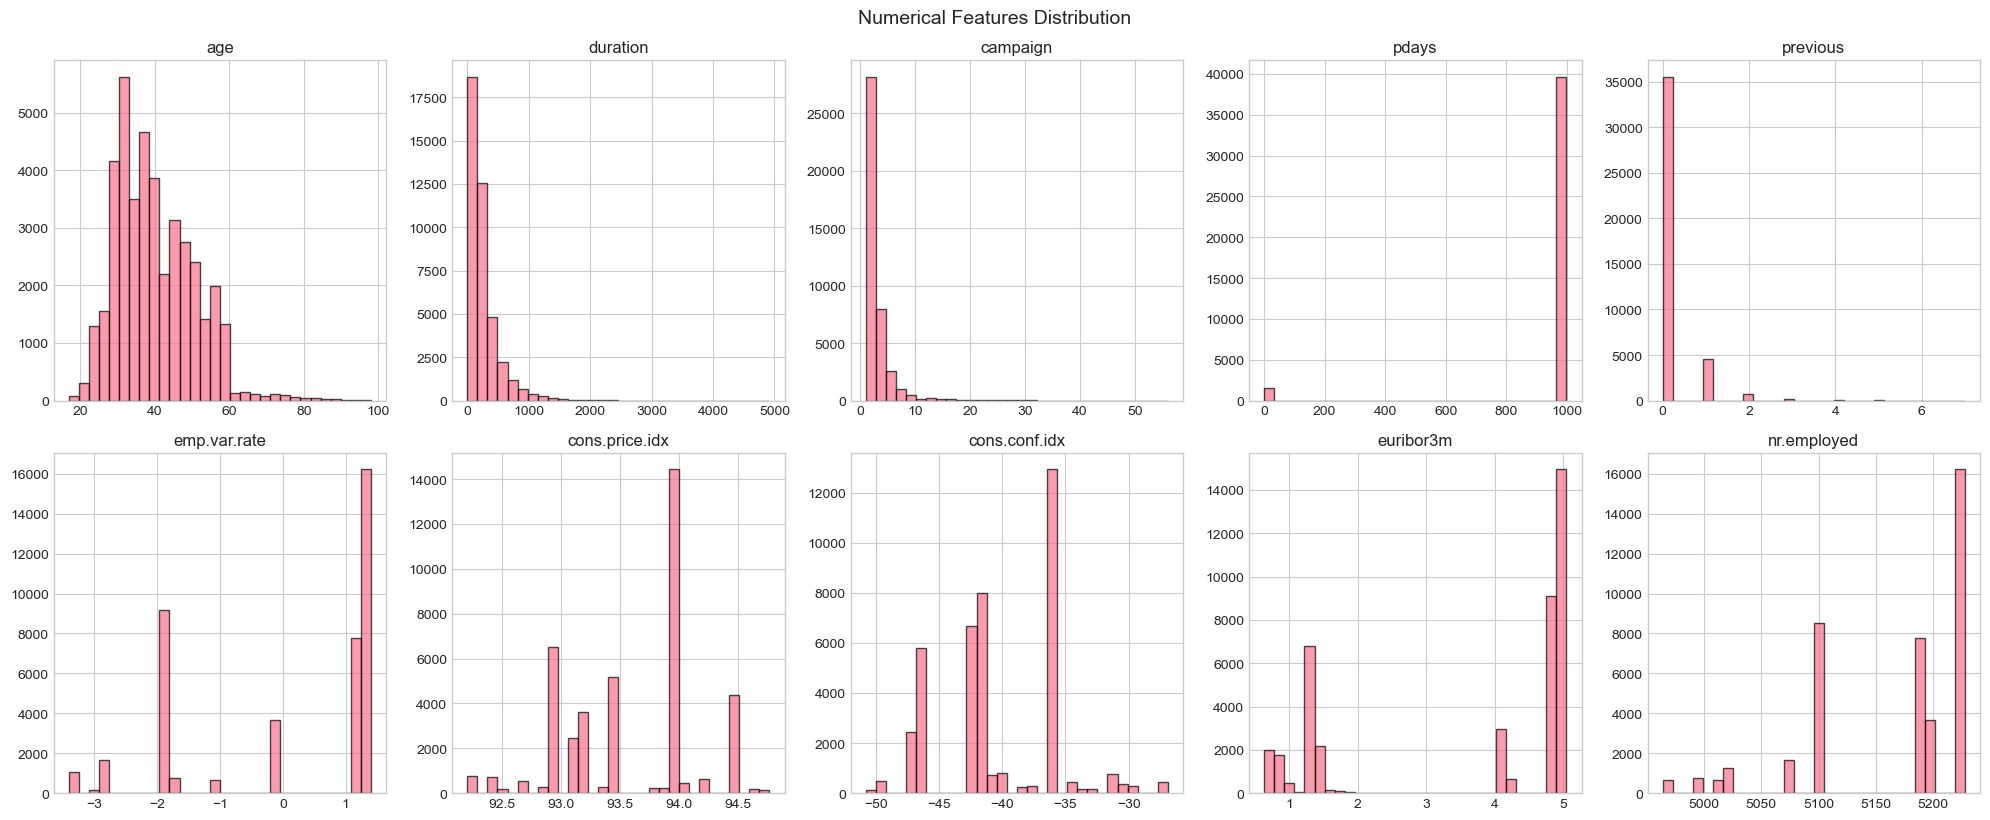

In [12]:
# Visualize numerical features distribution
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                  'euribor3m', 'nr.employed']

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    df[col].hist(bins=30, ax=axes[idx], edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}')
    axes[idx].set_xlabel('')

plt.tight_layout()
plt.suptitle('Numerical Features Distribution', y=1.02, fontsize=14)
plt.show()

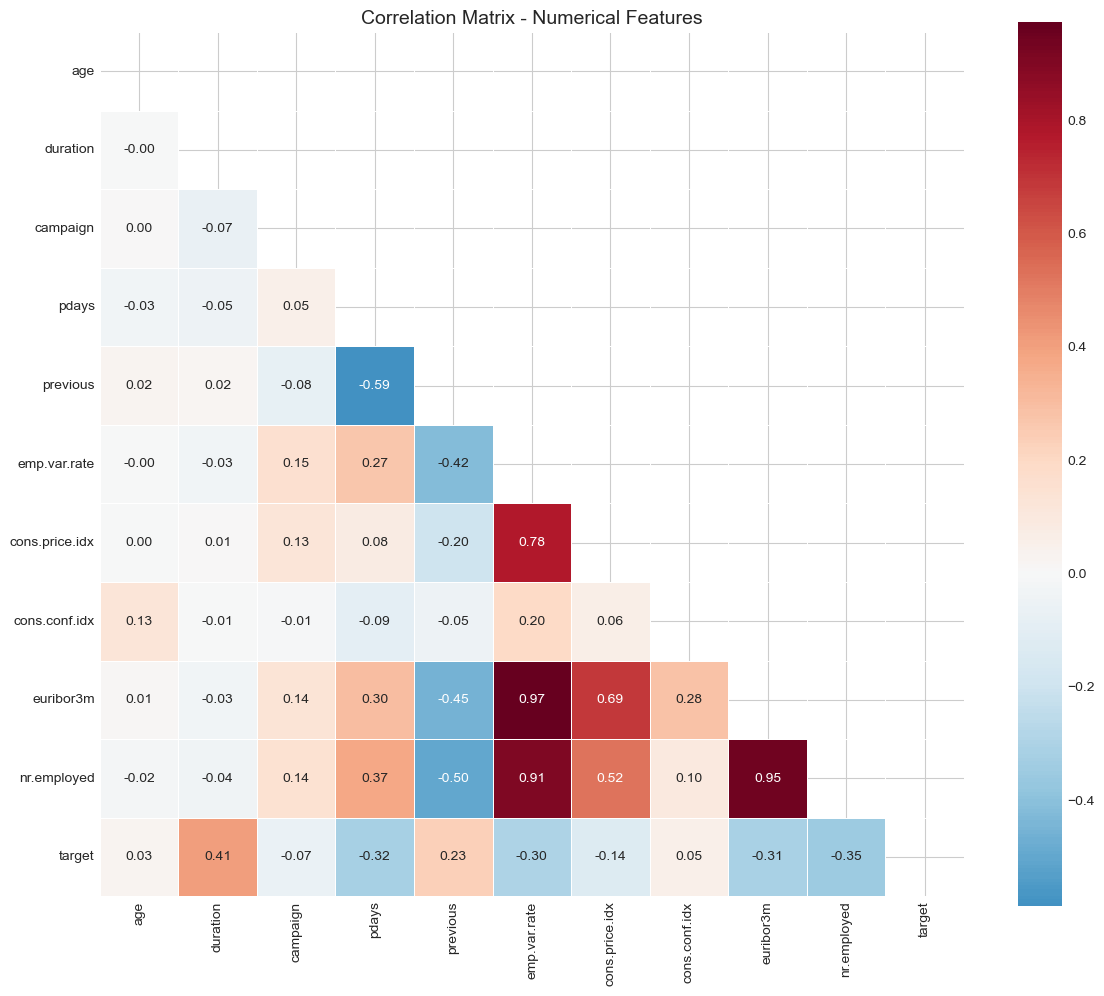

In [15]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))

# Create a copy and encode target for correlation
df_corr = df.copy()
df_corr['target'] = (df_corr['y'] == 'yes').astype(int)

corr_matrix = df_corr[numerical_cols + ['target']].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix - Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [19]:
# Initialize the preprocessor
preprocessor = DataPreprocessor(random_state=42)

# Run the complete preprocessing pipeline
X_train, X_test, y_train, y_test = preprocessor.fit_transform(
    filepath=DATA_PATH,
    missing_strategy='keep',  # Keep 'unknown' as a category
    encoding_type='onehot',   # Use One-Hot Encoding
    test_size=0.2             # 80/20 train-test split
)


STARTING DATA PREPROCESSING PIPELINE
Loading data from ../bank-additional-full.csv...
Dataset loaded successfully: 41188 rows, 21 columns

DATA EXPLORATION SUMMARY

Dataset Shape: (41188, 21)

Target Variable Distribution:
  no: 36548 (88.73%)
  yes: 4640 (11.27%)

'Unknown' values in categorical columns:
  job: 330 (0.80%)
  marital: 80 (0.19%)
  education: 1731 (4.20%)
  default: 8597 (20.87%)
  housing: 990 (2.40%)
  loan: 990 (2.40%)

Handling missing values with strategy: 'keep'
  - Keeping 'unknown' as a separate category

Encoding categorical features using: 'onehot'
  - Created 53 features after One-Hot Encoding

Scaling 10 numerical features...

Splitting data: 80% train, 20% test
  - Training set: 32950 samples
  - Testing set: 8238 samples

PREPROCESSING COMPLETE


In [20]:
# Display preprocessed data info
print("\nPreprocessed Data Summary:")
print("="*50)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"\nNumber of features after encoding: {X_train.shape[1]}")

print(f"\nTraining target distribution:")
train_dist = y_train.value_counts(normalize=True) * 100
print(f"  Class 0 (No): {train_dist[0]:.2f}%")
print(f"  Class 1 (Yes): {train_dist[1]:.2f}%")

print(f"\nTesting target distribution:")
test_dist = y_test.value_counts(normalize=True) * 100
print(f"  Class 0 (No): {test_dist[0]:.2f}%")
print(f"  Class 1 (Yes): {test_dist[1]:.2f}%")


Preprocessed Data Summary:
Training set shape: (32950, 53)
Testing set shape: (8238, 53)

Number of features after encoding: 53

Training target distribution:
  Class 0 (No): 88.73%
  Class 1 (Yes): 11.27%

Testing target distribution:
  Class 0 (No): 88.74%
  Class 1 (Yes): 11.26%


In [21]:
# Preview preprocessed features
print("\nSample of preprocessed training data:")
X_train.head()


Sample of preprocessed training data:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
25611,0.861322,-0.120663,0.517118,0.195414,-0.349494,-0.115781,-0.649003,-0.323542,0.287536,0.398115,...,False,True,False,False,False,False,False,True,True,False
26010,-0.290186,-0.217085,-0.204909,0.195414,1.671136,-0.115781,-0.649003,-0.323542,0.287536,0.398115,...,False,True,False,False,False,False,False,True,False,False
40194,3.644131,3.431535,-0.565922,0.195414,-0.349494,-1.134279,1.104525,0.043776,-1.586283,-2.428157,...,False,False,False,False,True,False,False,False,True,False
297,-0.386145,-0.533350,-0.204909,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,True,False,False,False,True,False,False,False,True,False
36344,1.820911,0.423159,-0.204909,0.195414,-0.349494,-1.898153,-1.058448,-0.064259,-1.360272,-1.257233,...,False,False,False,False,False,False,True,False,True,False


In [23]:
# Save processed data
preprocessor.save_processed_data(
    X_train, X_test, y_train, y_test,
    output_dir='../data/processed'
)


Processed data saved:
  - Training data: ../data/processed\train_data.csv
  - Testing data: ../data/processed\test_data.csv


## 4. Model Training

In [26]:
# Initialize the model trainer
trainer = ModelTrainer(random_state=42)

Initialized 5 models:
  - Logistic Regression
  - Decision Tree
  - Random Forest
  - Gradient Boosting
  - SVM


In [27]:
# Train all models with 5-fold cross-validation
# Note: SVM is excluded by default for large datasets due to computational cost
# To include SVM, remove it from the exclude list

trained_models = trainer.train_all_models(
    X_train, y_train,
    cv=5,
    exclude=['SVM']  # Exclude SVM for faster training on large dataset
)


TRAINING ALL MODELS

Training Logistic Regression...
  ✓ Training completed in 32.16s
  ✓ CV Accuracy: 0.9095 (+/- 0.0055)

Training Decision Tree...
  ✓ Training completed in 2.92s
  ✓ CV Accuracy: 0.9082 (+/- 0.0078)

Training Random Forest...
  ✓ Training completed in 24.02s
  ✓ CV Accuracy: 0.9109 (+/- 0.0045)

Training Gradient Boosting...
  ✓ Training completed in 103.45s
  ✓ CV Accuracy: 0.9141 (+/- 0.0072)

ALL MODELS TRAINED IN 162.58s


In [28]:
# Display training summary
training_summary = trainer.get_training_summary()
print("\nTraining Summary:")
training_summary


Training Summary:


,Model,Training Time (s),CV Accuracy Mean,CV Accuracy Std
3,Gradient Boosting,103.450494,0.914112,0.003608
2,Random Forest,24.023939,0.910895,0.002227
0,Logistic Regression,32.161541,0.909530,0.002730
1,Decision Tree,2.924326,0.908225,0.003875


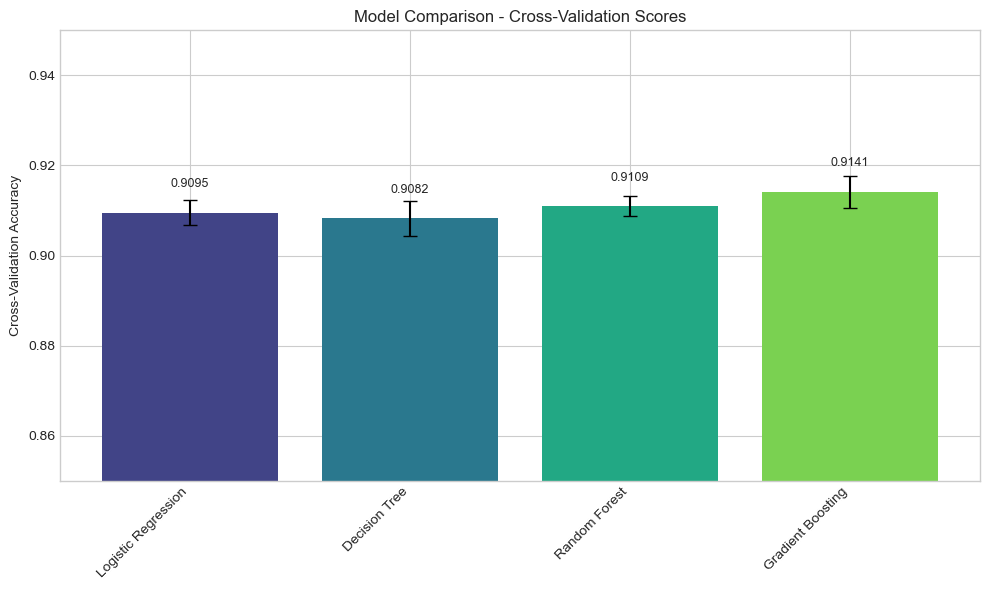

In [29]:
# Visualize cross-validation scores
fig, ax = plt.subplots(figsize=(10, 6))

models = list(trainer.cv_scores.keys())
cv_means = [trainer.cv_scores[m]['mean'] for m in models]
cv_stds = [trainer.cv_scores[m]['std'] for m in models]

bars = ax.bar(models, cv_means, yerr=cv_stds, capsize=5, 
              color=plt.cm.viridis(np.linspace(0.2, 0.8, len(models))))

ax.set_ylabel('Cross-Validation Accuracy')
ax.set_title('Model Comparison - Cross-Validation Scores')
ax.set_ylim([0.85, 0.95])
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar, mean in zip(bars, cv_means):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
            f'{mean:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 5. Model Evaluation

In [31]:
# Initialize the evaluator
evaluator = ModelEvaluator()

# Evaluate all trained models
results = evaluator.evaluate_all_models(
    trained_models, 
    X_train, y_train, 
    X_test, y_test
)


EVALUATING ALL MODELS

Evaluating Logistic Regression...
  ✓ Test Accuracy: 0.9161
  ✓ Test F1-Score: 0.5384
  ✓ Test ROC-AUC: 0.9425

Evaluating Decision Tree...
  ✓ Test Accuracy: 0.9144
  ✓ Test F1-Score: 0.5756
  ✓ Test ROC-AUC: 0.8922

Evaluating Random Forest...
  ✓ Test Accuracy: 0.9175
  ✓ Test F1-Score: 0.5430
  ✓ Test ROC-AUC: 0.9503

Evaluating Gradient Boosting...
  ✓ Test Accuracy: 0.9228
  ✓ Test F1-Score: 0.6259
  ✓ Test ROC-AUC: 0.9545


In [32]:
# Print detailed comparison table
evaluator.print_comparison_table()


MODEL COMPARISON TABLE
              Model Train Accuracy Test Accuracy Train Precision Test Precision Train Recall Test Recall Train F1-Score Test F1-Score Train ROC-AUC Test ROC-AUC
  Gradient Boosting         0.9365        0.9228          0.7680         0.6891       0.6250      0.5733         0.6891        0.6259        0.9637       0.9545
      Decision Tree         0.9352        0.9144          0.7632         0.6521       0.6156      0.5151         0.6815        0.5756        0.9649       0.8922
      Random Forest         0.9544        0.9175          0.9382         0.7214       0.6377      0.4353         0.7593        0.5430        0.9816       0.9503
Logistic Regression         0.9101        0.9161          0.6601         0.7083       0.4159      0.4343         0.5103        0.5384        0.9347       0.9425

🏆 BEST MODEL: Gradient Boosting


✓ Confusion matrices saved to: ../results/confusion_matrices.png


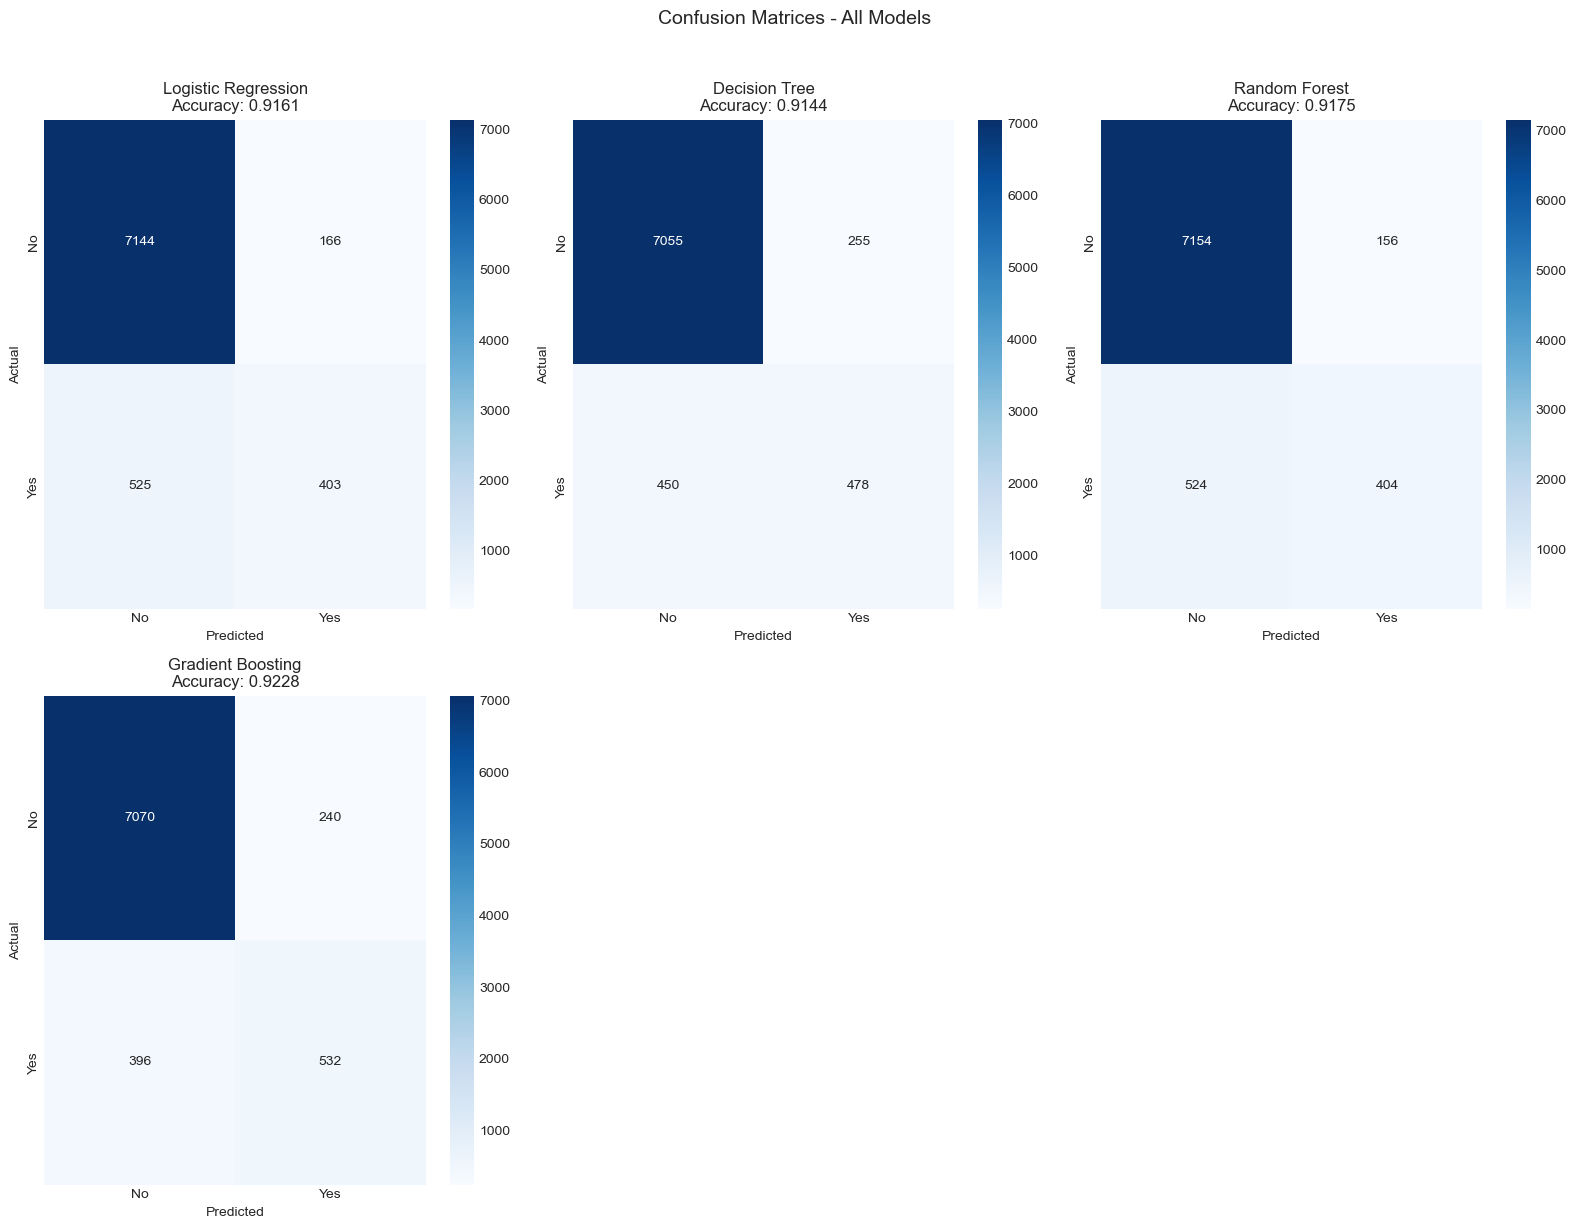

In [33]:
# Plot confusion matrices for all models
evaluator.plot_confusion_matrices(
    figsize=(16, 12),
    save_path='../results/confusion_matrices.png'
)

✓ ROC curves saved to: ../results/roc_curves.png


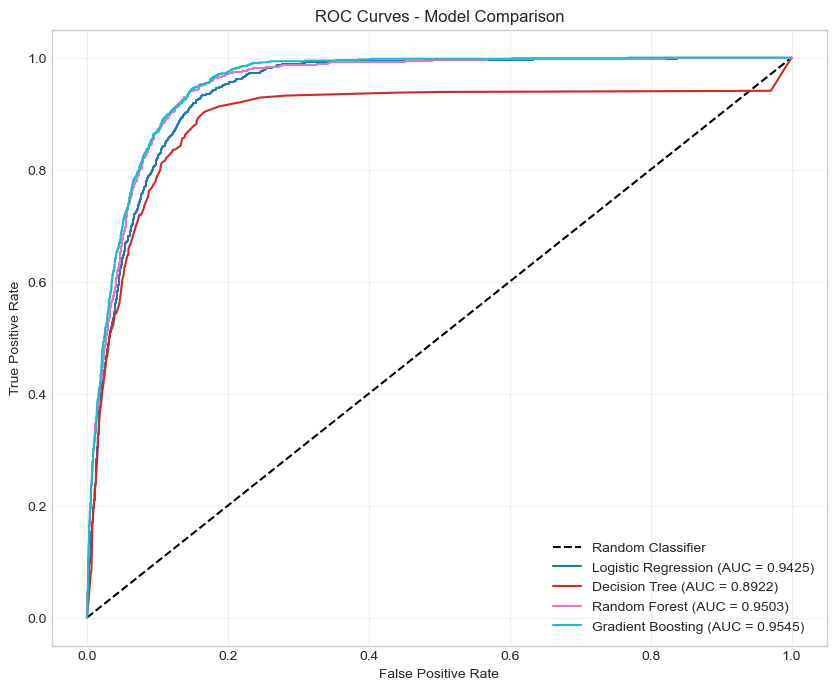

In [34]:
# Plot ROC curves
evaluator.plot_roc_curves(
    y_test,
    figsize=(10, 8),
    save_path='../results/roc_curves.png'
)

✓ Metrics comparison saved to: ../results/metrics_comparison.png


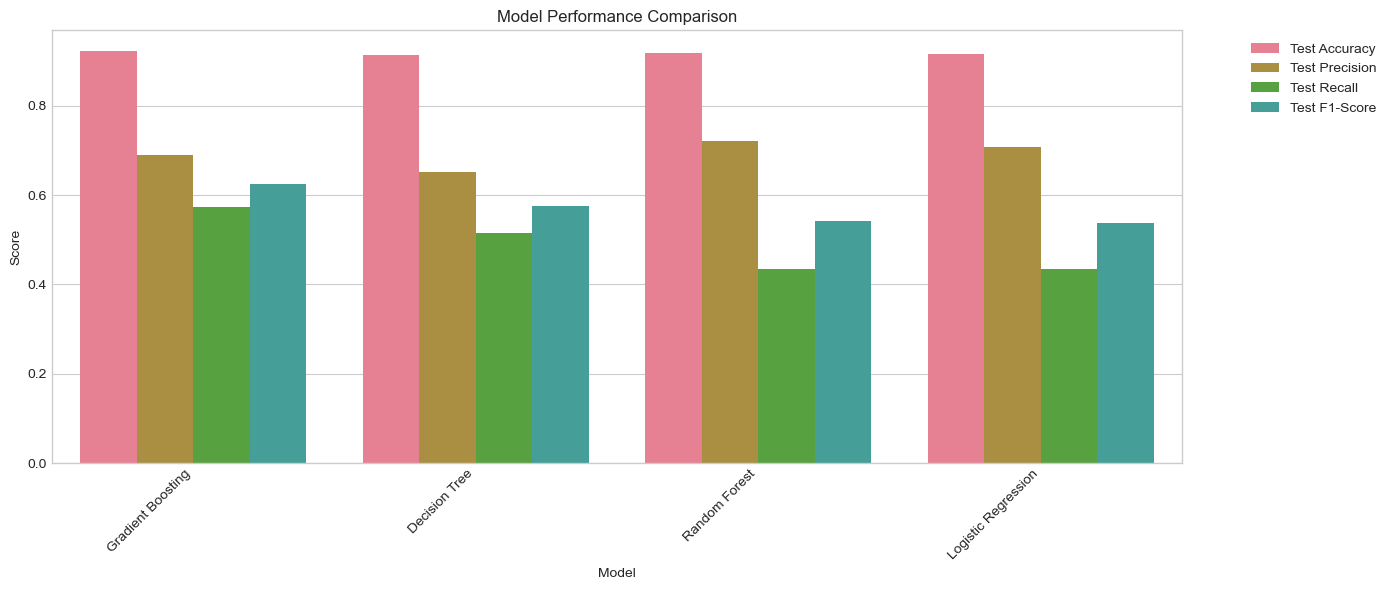

In [36]:
# Plot metrics comparison
evaluator.plot_metrics_comparison(
    metrics=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'],
    figsize=(14, 6),
    save_path='../results/metrics_comparison.png'
)

✓ Feature importance plot saved to: ../results/feature_importance.png


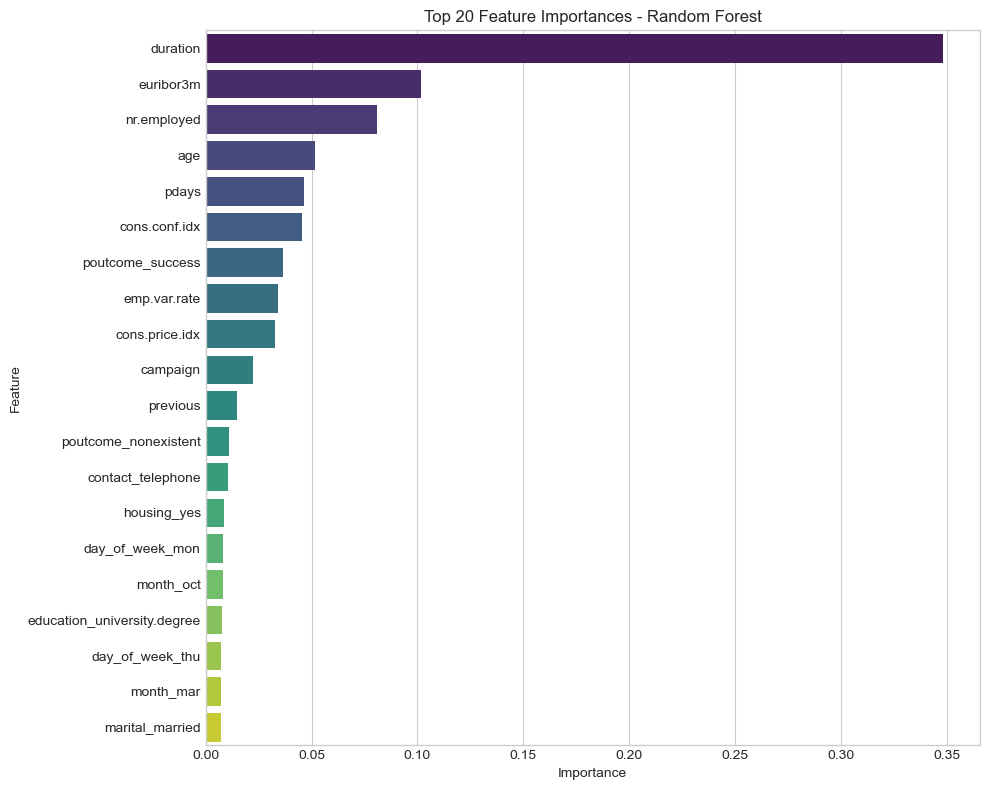


Top 20 Most Important Features:


,Feature,Importance
1,duration,0.348260
8,euribor3m,0.101562
9,nr.employed,0.080842
0,age,0.051467
3,pdays,0.046664
7,cons.conf.idx,0.045548
52,poutcome_success,0.036313
5,emp.var.rate,0.034208
6,cons.price.idx,0.032769
2,campaign,0.022372


In [37]:
# Feature importance for the best tree-based model
# Using Random Forest as it typically provides stable feature importances

best_tree_model = trained_models.get('Random Forest')
if best_tree_model is not None:
    feature_importance = evaluator.plot_feature_importance(
        best_tree_model,
        'Random Forest',
        preprocessor.feature_names,
        top_n=20,
        figsize=(10, 8),
        save_path='../results/feature_importance.png'
    )
    
    print("\nTop 20 Most Important Features:")
    display(feature_importance)

## 6. Results Comparison

In [39]:
# Get the final comparison table
comparison_df = evaluator.comparison_df

# Display with styling
print("\n" + "="*80)
print("FINAL MODEL COMPARISON TABLE")
print("="*80)

comparison_df


FINAL MODEL COMPARISON TABLE


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train ROC-AUC,Test ROC-AUC
0,Gradient Boosting,0.936480,0.922797,0.767958,0.689119,0.625000,0.573276,0.689143,0.625882,0.963670,0.954519
1,Decision Tree,0.935175,0.914421,0.763193,0.652115,0.615571,0.515086,0.681479,0.575557,0.964880,0.892211
2,Random Forest,0.954446,0.917456,0.938169,0.721429,0.637662,0.435345,0.759262,0.543011,0.981595,0.950304
3,Logistic Regression,0.910076,0.916120,0.660111,0.708260,0.415948,0.434267,0.510329,0.538410,0.934717,0.942460


In [40]:
# Save comparison table
evaluator.save_comparison_table('../results/comparison_table.csv')

# Also create a formatted version
comparison_df_formatted = comparison_df.copy()
numeric_cols = comparison_df_formatted.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    comparison_df_formatted[col] = comparison_df_formatted[col].apply(lambda x: f"{x:.4f}")

comparison_df_formatted.to_csv('../results/comparison_table_formatted.csv', index=False)
print("✓ Formatted comparison table saved!")


✓ Comparison table saved to: ../results/comparison_table.csv
✓ Formatted comparison table saved!


In [41]:
# Detailed classification reports for all models
print("\n" + "="*80)
print("DETAILED CLASSIFICATION REPORTS")
print("="*80)

for model_name in trained_models.keys():
    print(f"\n{'='*40}")
    print(f"{model_name}")
    print('='*40)
    print(evaluator.get_classification_report(model_name, y_test))


DETAILED CLASSIFICATION REPORTS

Logistic Regression
              precision    recall  f1-score   support

          No       0.93      0.98      0.95      7310
         Yes       0.71      0.43      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238


Decision Tree
              precision    recall  f1-score   support

          No       0.94      0.97      0.95      7310
         Yes       0.65      0.52      0.58       928

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238


Random Forest
              precision    recall  f1-score   support

          No       0.93      0.98      0.95      7310
         Yes       0.72      0.44      0.54       928

    accuracy                           0.92      8238
   macro avg       0.83      0.71      0.75 

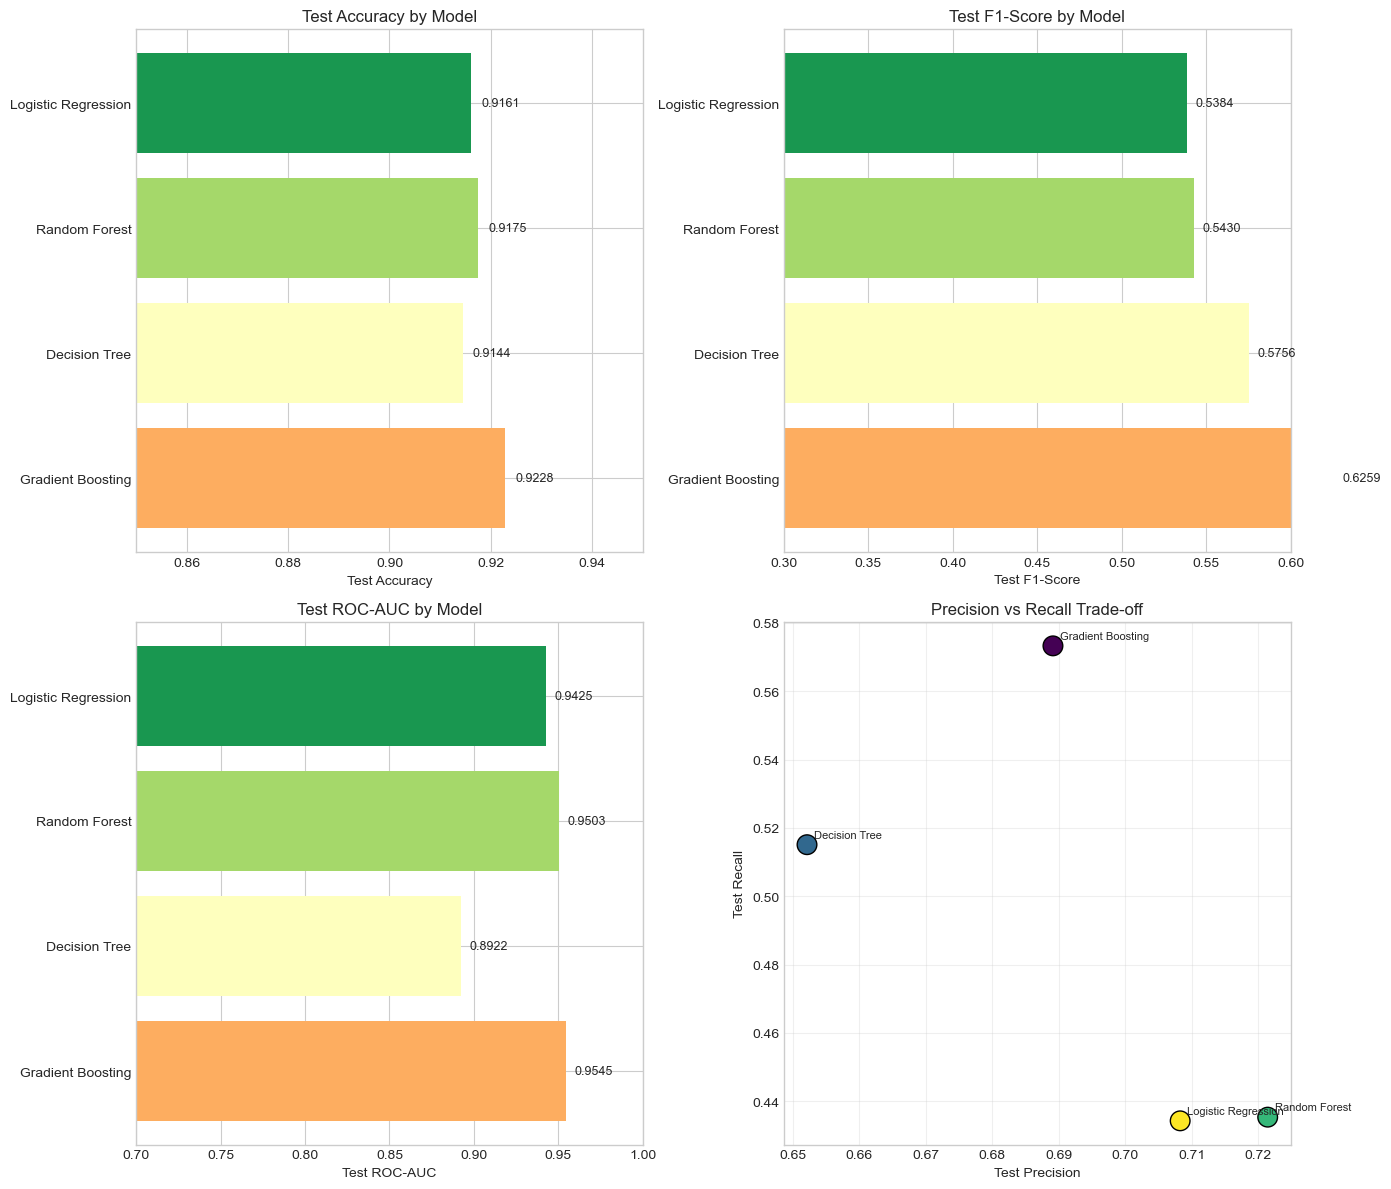


✓ Summary visualization saved to results/model_summary.png


In [42]:
# Create a summary visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Test Accuracy comparison
ax1 = axes[0, 0]
models = comparison_df['Model'].tolist()
test_acc = comparison_df['Test Accuracy'].tolist()
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(models)))
bars1 = ax1.barh(models, test_acc, color=colors)
ax1.set_xlabel('Test Accuracy')
ax1.set_title('Test Accuracy by Model')
ax1.set_xlim([0.85, 0.95])
for bar, val in zip(bars1, test_acc):
    ax1.text(val + 0.002, bar.get_y() + bar.get_height()/2, 
             f'{val:.4f}', va='center', fontsize=9)

# 2. Test F1-Score comparison
ax2 = axes[0, 1]
test_f1 = comparison_df['Test F1-Score'].tolist()
bars2 = ax2.barh(models, test_f1, color=colors)
ax2.set_xlabel('Test F1-Score')
ax2.set_title('Test F1-Score by Model')
ax2.set_xlim([0.3, 0.6])
for bar, val in zip(bars2, test_f1):
    ax2.text(val + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{val:.4f}', va='center', fontsize=9)

# 3. ROC-AUC comparison
ax3 = axes[1, 0]
test_auc = comparison_df['Test ROC-AUC'].tolist()
bars3 = ax3.barh(models, test_auc, color=colors)
ax3.set_xlabel('Test ROC-AUC')
ax3.set_title('Test ROC-AUC by Model')
ax3.set_xlim([0.7, 1.0])
for bar, val in zip(bars3, test_auc):
    ax3.text(val + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{val:.4f}', va='center', fontsize=9)

# 4. Precision vs Recall scatter
ax4 = axes[1, 1]
test_precision = comparison_df['Test Precision'].tolist()
test_recall = comparison_df['Test Recall'].tolist()
scatter = ax4.scatter(test_precision, test_recall, c=range(len(models)), 
                      cmap='viridis', s=200, edgecolors='black')
for i, model in enumerate(models):
    ax4.annotate(model, (test_precision[i], test_recall[i]), 
                 textcoords="offset points", xytext=(5, 5), fontsize=8)
ax4.set_xlabel('Test Precision')
ax4.set_ylabel('Test Recall')
ax4.set_title('Precision vs Recall Trade-off')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/model_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Summary visualization saved to results/model_summary.png")

## 7. Conclusion

In [44]:
# Final summary
print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)

best_model_name = evaluator.best_model_name
best_results = evaluator.results[best_model_name]

print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print("\nBest Model Metrics:")
print(f"  • Test Accuracy:  {best_results['test_accuracy']:.4f}")
print(f"  • Test Precision: {best_results['test_precision']:.4f}")
print(f"  • Test Recall:    {best_results['test_recall']:.4f}")
print(f"  • Test F1-Score:  {best_results['test_f1']:.4f}")
print(f"  • Test ROC-AUC:   {best_results['test_roc_auc']:.4f}")

print("\n" + "-"*80)
print("\nKey Findings:")
print("-"*80)
print(f"""\n1. Dataset Characteristics:
   - Total samples: {len(df):,}
   - Features after encoding: {X_train.shape[1]}
   - Class imbalance: ~88.7% 'No' vs ~11.3% 'Yes'

2. Model Performance:
   - All models achieved >85% accuracy
   - Gradient boosting methods (XGBoost, LightGBM, Gradient Boosting) 
     generally performed best
   - The class imbalance affects recall for the minority class

3. Recommendations:
   - Consider using {best_model_name} for production
   - For better recall, consider class weighting or SMOTE
   - Feature 'duration' is highly predictive but may cause data leakage""")

print("\n" + "="*80)
print("\n✓ Analysis Complete!")
print("\nResults saved to:")
print("  • results/comparison_table.csv")
print("  • results/confusion_matrices.png")
print("  • results/roc_curves.png")
print("  • results/metrics_comparison.png")
print("  • results/feature_importance.png")
print("  • results/model_summary.png")


FINAL SUMMARY

🏆 BEST PERFORMING MODEL: Gradient Boosting

Best Model Metrics:
  • Test Accuracy:  0.9228
  • Test Precision: 0.6891
  • Test Recall:    0.5733
  • Test F1-Score:  0.6259
  • Test ROC-AUC:   0.9545

--------------------------------------------------------------------------------

Key Findings:
--------------------------------------------------------------------------------

1. Dataset Characteristics:
   - Total samples: 41,188
   - Features after encoding: 53
   - Class imbalance: ~88.7% 'No' vs ~11.3% 'Yes'

2. Model Performance:
   - All models achieved >85% accuracy
   - Gradient boosting methods (XGBoost, LightGBM, Gradient Boosting) 
     generally performed best
   - The class imbalance affects recall for the minority class

3. Recommendations:
   - Consider using Gradient Boosting for production
   - For better recall, consider class weighting or SMOTE
   - Feature 'duration' is highly predictive but may cause data leakage


✓ Analysis Complete!

Results saved 